[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/colab_notebooks/blob/master/Chap2_machine_learning_in_action.ipynb)

# Machine Learning in Action

## Chapter 2

### k-Nearest Neighbours

We cluster the data based on the closeness of data points to each other using distance measurement. In simple words, grouping data points together which have minimal distance between them.

When a new data input is given, we calculate its distance from each cluster points, and select the most similar clusters (nearest neighbours). From this, we look at the top *k* clusters.

**Pros:** High accuracy, insensitive to outliers, no assumptions about data

**Cons:** Computationally expensive, requires a lot of memory

**Works with:** Numeric values, nominal values

## Import Dependencies

In [0]:
import numpy as np
import operator

### Let's create a sample dataset

In [0]:
def create_dataset():
    group = np.array([[1., 1.1], [1., 1.], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [0]:
group, labels = create_dataset()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

## Classification using kNN

For every datapoint we will:


*   Calculate the distance between input data point (inX) and each point in trained dataset matrix with corresponding classification labels
*   Sort distances in increasing order
*   Select *k* items with lowest distances to inX
*   Find majority of items among these *k* items
*   Return the majority class as the classification of inX.



### Distance calculation logic

Distance between data points is calculated by using Euclidian distance.

![Euclidian distance formula](https://i.imgur.com/I9sKgfn.png)

In [0]:
def knn_classify(inX, dataset, labels, k):
    
    # Step 1: Calculate distance between inX and
    # datapoints in dataset
    
    dataset_size = dataset.shape[0] # No. of rows
    diff_mat = np.tile(inX, (dataset_size, 1)) - dataset # Calculate difference between points
    
    sq_diff_mat = diff_mat**2 # Square the differences
    
    sq_distance = sq_diff_mat.sum(axis=1) # Sum the squared differences
    
    ## This is the Euclidian distance
    distance = sq_distance**0.5 # Take square root of sum of squared difference
    
    # Step 2: Sort distances in increasing order
    sorted_distance = distance.argsort()
    
    # Step 3: Select k items with lowest distance
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_distance[i]] # Get the labels/class of ith index
        class_count[vote_label] = class_count.get(vote_label, 0) + 1 # Add count of label
    
    # Step 4: Find label/class with majority of items (max count)
    sorted_class_count = sorted(class_count.items(),
                               key=operator.itemgetter(1), reverse=True)
    
    # Step 5: Return the label with majority/max count
    return sorted_class_count[0][0]

In [7]:
knn_classify([0, 0], group, labels, 3)

'B'

## Real world example
Let's create a kNN classifier for imrpoving process of finding matches between people.

## Steps
- Collect
- Prepare
- Analyze
- Train
- Test
- Use

### Collect

In [0]:
# Download dataset from Github repo of book author
!wget https://raw.githubusercontent.com/pbharrin/machinelearninginaction/master/Ch02/datingTestSet.txt

| No. of Frequent flyer miles | Percentage of time spent playing video games | Liters of ice cream consumed | Likeness |
| --- | --- | --- |


In [16]:
!head datingTestSet.txt

40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike
75136	13.147394	0.428964	didntLike
38344	1.669788	0.134296	didntLike
72993	10.141740	1.032955	didntLike
35948	6.830792	1.213192	largeDoses
42666	13.276369	0.543880	largeDoses
67497	8.631577	0.749278	didntLike
35483	12.273169	1.508053	largeDoses


### Prepare

In [0]:
def file2matrix(filename):
    # Dictionary to convert output labels to integer value
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    
    # Read file contents
    with open(filename, 'r') as infile:
        
        num_of_lines = len(infile.readlines())
        return_mat = np.zeros((num_of_lines, 3)) # X_train
        
        label_vector = [] # Y_train
        infile.seek(0) # Seek file pointer to beginning of file
        idx = 0
        
        for line in infile.readlines():
            line = line.strip() # Remove any trailing whitespaces
            
            line_list = line.split('\t') # Split the data separated by tabs
            return_mat[idx, :] = line_list[0:3] # Assign X with columns except the label(last) column
            if line_list[-1].isdigit():
                label_vector.append(int(line_list[-1]))
            else:
                label_vector.append(love_dictionary.get(line_list[-1]))
            idx += 1
            
        return return_mat, label_vector # Return X_train, Y_train

In [0]:
dating_data, dating_labels = file2matrix('datingTestSet.txt')

In [21]:
dating_data

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [23]:
dating_labels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

### Analyze

In [0]:
import matplotlib
import matplotlib.pyplot as plt

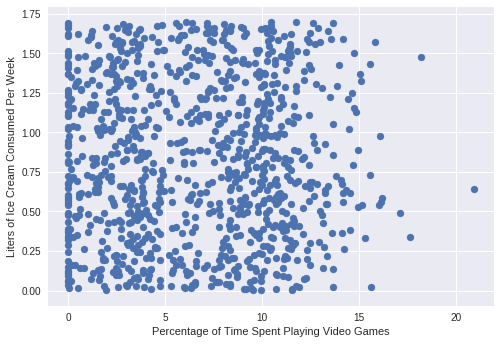

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dating_data[:, 1], dating_data[:, 2])
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()

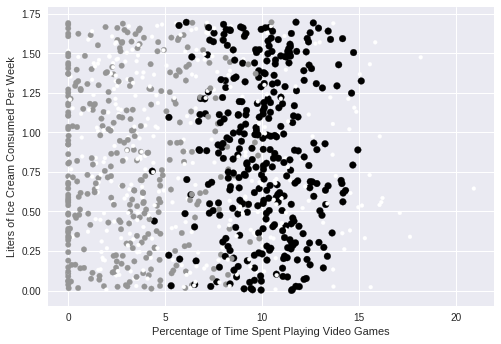

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dating_data[:,1], dating_data[:,2],
15.0*np.array(dating_labels), 15.0*np.array(dating_labels))
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()

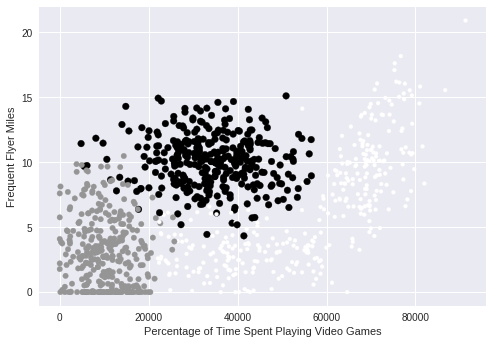

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dating_data[:,0], dating_data[:,1],
15.0*np.array(dating_labels), 15.0*np.array(dating_labels))
plt.ylabel('Frequent Flyer Miles')
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.show()

### Normalize Data

In [0]:
def normalize(data):
    min_val = data.min(0)
    max_val = data.max(0)
    
    data_range = max_val - min_val
    
    data_norm = np.zeros(data.shape)
    
    rows = data_norm.shape[0]
    
    data_norm = data - np.tile(min_val, (rows, 1))
    data_norm = data / np.tile(data_range, (rows, 1))
    
    return data_norm, data_range, min_val

In [0]:
data_norm, data_range, min_val = normalize(dating_data)

In [44]:
data_norm

array([[0.44832535, 0.39805139, 0.56301579],
       [0.15873259, 0.34195467, 0.98792642],
       [0.28542943, 0.06892523, 0.47517855],
       ...,
       [0.29115949, 0.50910294, 0.51147719],
       [0.52711097, 0.43665451, 0.42968706],
       [0.47940793, 0.3768091 , 0.7864003 ]])

In [45]:
data_range

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [46]:
min_val

array([0.      , 0.      , 0.001156])

### Testing

In [0]:
def test_dating():
    split_ratio = 0.10
    dating_data, dating_labels = file2matrix('datingTestSet.txt')
    data_norm, data_range, data_min = normalize(dating_data)
    rows = data_norm.shape[0]
    
    num_test = int(rows*split_ratio)
    error = 0.0
    for i in range(num_test):
        class_result = knn_classify(data_norm[i, :],
                                   data_norm[num_test:rows, :],
                                   dating_labels[num_test:rows],
                                   3)
        print("The classifier returned ", class_result, ". The real answer is",
             dating_labels[i])
        if class_result != dating_labels[i]:
            error += 1.0
    print("Total Error: ", error/float(num_test))

In [50]:
test_dating()

The classifier returned  3 . The real answer is 3
The classifier returned  2 . The real answer is 2
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  3 . The real answer is 3
The classifier returned  3 . The real answer is 3
The classifier returned  1 . The real answer is 1
The classifier returned  3 . The real answer is 3
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  2 . The real answer is 2
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  1 . The real answer is 1
The classifier returned  2 . The real answer is 2
The classifier returned  3 . The real answer is 3


### Classification

In [0]:
def classify_person():
    result_list = ['Not at all', 
                  'In small doses',
                  'In large doses']
    percent_game = float(input(\
        "Percentage of time spent playing video games ?"))
    fly_miles = float(input(\
        "Frequent flyer miles earned per year ?"))
    ice_cream = float(input(\
        "Liters of ice cream consumed per year ?"))
    
    dating_data, dating_labels = file2matrix('datingTestSet.txt')
    data_norm, data_range, data_min = normalize(dating_data)
    
    input_data = np.array([fly_miles, percent_game, ice_cream])
    class_result = knn_classify((input_data-data_min)/data_range,
                               data_norm, dating_labels, 3)
    print("You will probably like this person ", result_list[class_result - 1])

In [55]:
classify_person()

Percentage of time spent playing video games ?10
Frequent flyer miles earned per year ?10000
Liters of ice cream consumed per year ?0.5
You will probably like this person  In small doses
